<a href="https://colab.research.google.com/github/manan2911/Insurance-Cost-data-analysis/blob/main/RESnet_chestscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
from keras import Sequential
from keras.layers import Flatten,Dense,BatchNormalization,Dropout,LeakyReLU,GlobalAveragePooling2D
from keras.optimizers import Adam,RMSprop
from keras.losses import BinaryCrossentropy
from tensorflow.python.keras.applications.resnet import ResNet50
from keras.callbacks import EarlyStopping

In [4]:
train_path = "/content/drive/MyDrive/chest_xray/train"
val_path = '/content/drive/MyDrive/chest_xray/val'
test_path = '/content/drive/MyDrive/chest_xray/test'
train_val_generator = ImageDataGenerator(rescale=1./255,horizontal_flip=True,zoom_range=0.3)
test_generator = ImageDataGenerator(rescale=1./255)

In [5]:
train = train_val_generator.flow_from_directory(train_path,
                                               batch_size=128,
                                               target_size=(220,220),
                                               color_mode="rgb",
                                               class_mode="binary",
                                               shuffle=True,
                                               seed=42,
                                               subset="training")

val = train_val_generator.flow_from_directory(val_path,
                                               batch_size=4,
                                               target_size=(220,220),
                                               color_mode="rgb",
                                               class_mode="binary",
                                               shuffle=True,
                                               seed=42)
test = test_generator.flow_from_directory(test_path,
                                          batch_size=32,
                                          target_size=(220,220),
                                          color_mode="rgb",
                                          class_mode="binary")

Found 5233 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
resnet50 = ResNet50(weights = "imagenet", input_shape = (220,220,3), include_top = False)

In [7]:
for layer in resnet50.layers:
    layer.trainable = False
model = Sequential()

model.add(resnet50)

for layer in resnet50.layers:
    layer.trainable = False
    
model.add(Flatten())

model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = "sigmoid"))

In [8]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])


In [9]:
hist = model.fit(train,validation_data=val,epochs=1)

41/41 [==============================] - 2712s 67s/step - loss: 4.7363 - accuracy: 0.6394 - val_loss: 0.6933 - val_accuracy: 0.5000


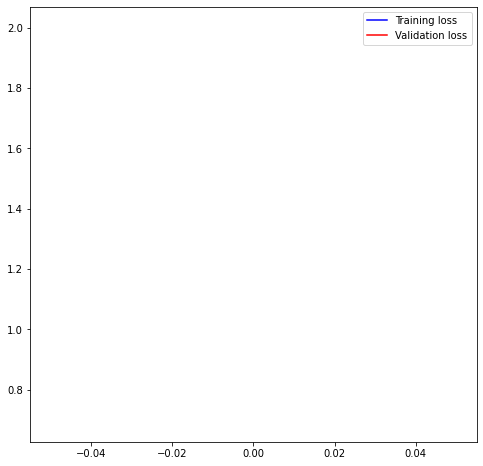

<Figure size 432x288 with 0 Axes>

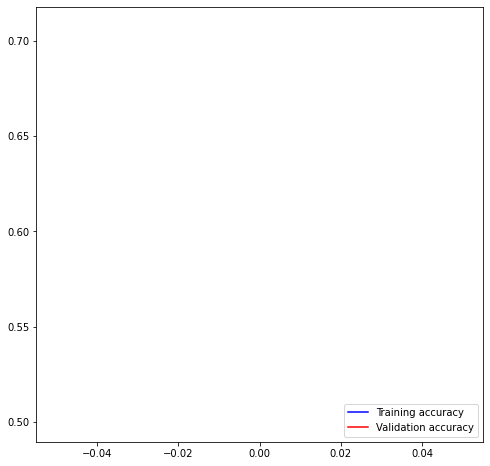

In [11]:
plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

In [12]:
test_results = model.evaluate(test)

20/20 [==============================] - 312s 16s/step - loss: 0.6895 - accuracy: 0.6250
